REA Differential Equations Notebook

* Page 1A

Tutor:
* Anthropic's AI, Claude

**Newton's Law of Cooling**
   - $\frac{dT}{dt} = -k(T - T_a)$
   - Models temperature change


Newton's Law of Cooling Analysis with Error Metrics
------------------------------------------------
Initial Temperature: 100.0°C
Ambient Temperature: 20.0°C
Cooling Constant: 0.1 min⁻¹
Half-life: 6.93 minutes

Error Analysis Metrics:
----------------------
Maximum Absolute Error: 0.000002°C
Mean Absolute Error: 0.000000°C
Root Mean Square Error: 0.000000°C
Maximum Relative Error: 0.000004%
Mean Relative Error: 0.000001%

Tabulated Results:
+----+--------------+-------------------+------------------+-----------------------+----------------------+-------------------------+
|    |   Time (min) |   Analytical (°C) |   Numerical (°C) |   Absolute Error (°C) |   Relative Error (%) |   Cooling Rate (°C/min) |
+====+==============+===================+==================+=======================+======================+=========================+
|  0 |     0.000000 |        100.000000 |       100.000000 |              0.000000 |             0.000000 |               -8.000000 |
+----+------------

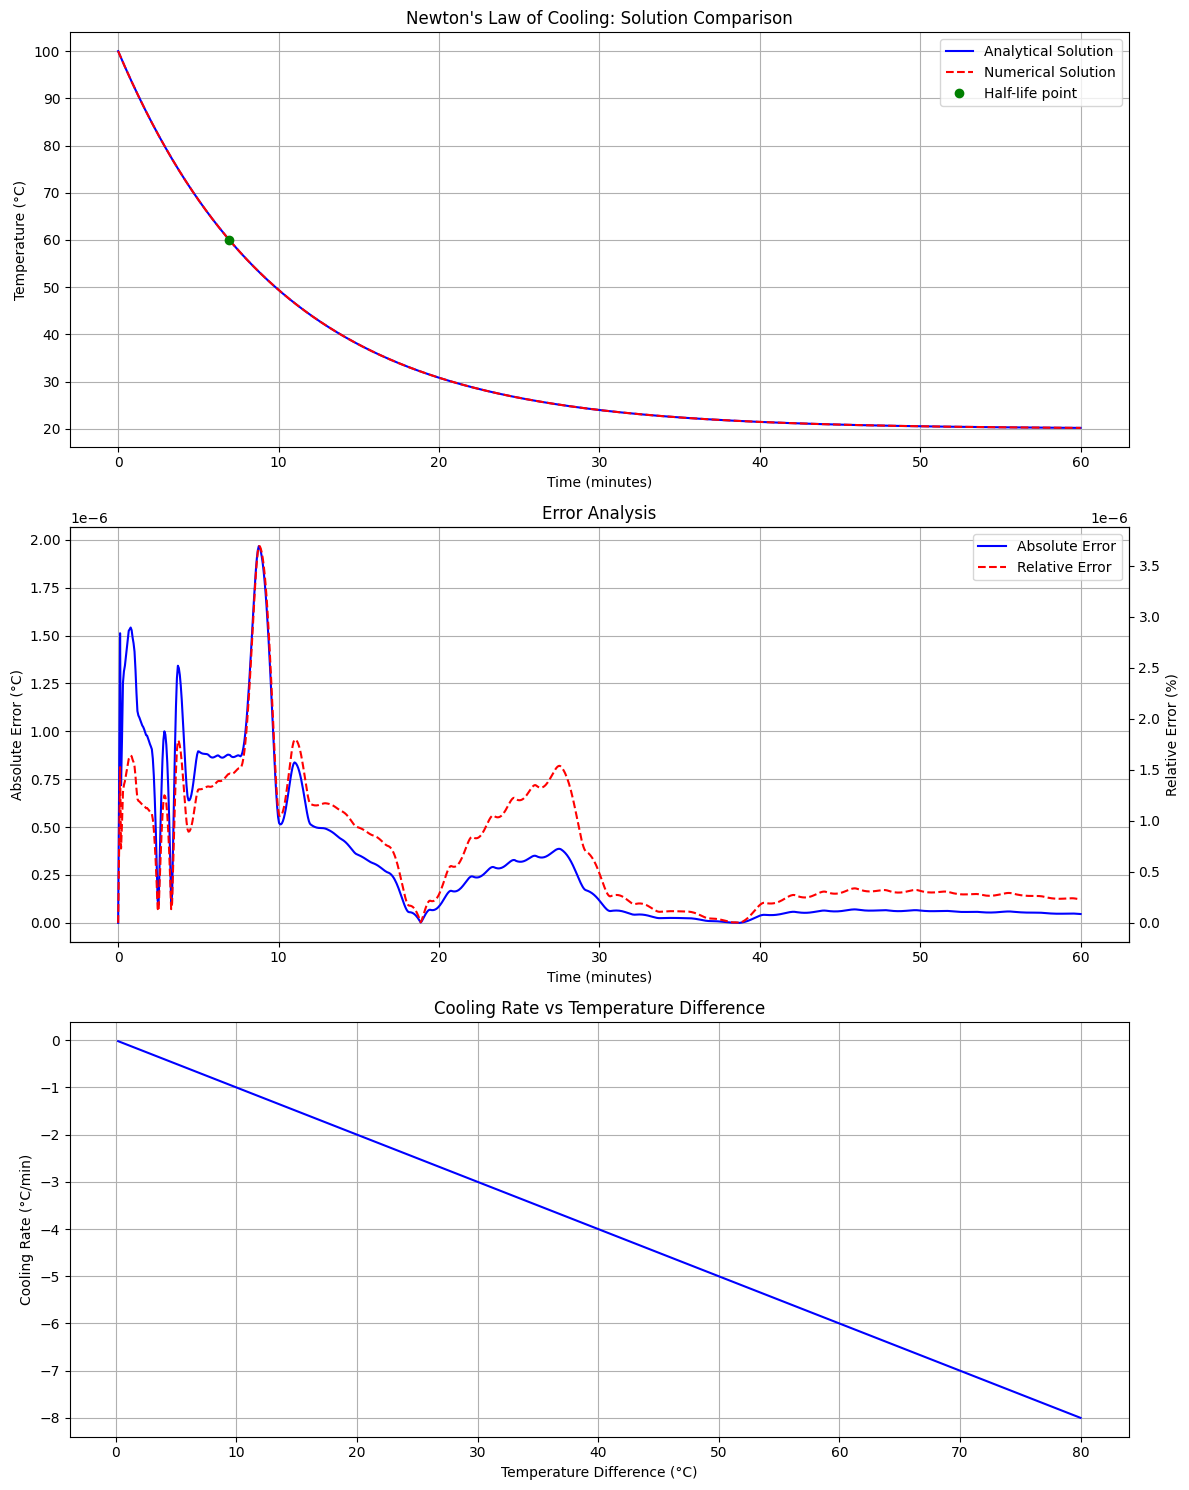

In [1]:
"""
Abstract:
---------
This script simulates and visualizes Newton's Law of Cooling using numerical and analytical methods,
including comprehensive error analysis between numerical and analytical solutions.
It models the temperature change of an object cooling towards ambient temperature, following the equation:
dT/dt = -k(T - Ta)

The script includes:
1. Analytical and numerical solutions
2. Error analysis (absolute and relative errors)
3. Visualizations of solutions and errors
4. Tabulated data with error metrics
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from tabulate import tabulate

# Previous functions remain the same
def analytical_solution(t, T0, Ta, k):
    return Ta + (T0 - Ta) * np.exp(-k * t)

def cooling_rate(T, t, Ta, k):
    return -k * (T - Ta)

def calculate_half_life(k):
    return np.log(2) / k

def calculate_error_metrics(analytical, numerical):
    """
    Calculate various error metrics between analytical and numerical solutions.

    Parameters:
    -----------
    analytical : array-like
        Analytical solution values
    numerical : array-like
        Numerical solution values

    Returns:
    --------
    dict
        Dictionary containing various error metrics
    """
    absolute_error = np.abs(analytical - numerical.flatten())
    relative_error = np.abs(absolute_error / analytical) * 100  # in percentage

    metrics = {
        'max_absolute_error': np.max(absolute_error),
        'mean_absolute_error': np.mean(absolute_error),
        'rmse': np.sqrt(np.mean(absolute_error**2)),
        'max_relative_error': np.max(relative_error),
        'mean_relative_error': np.mean(relative_error)
    }
    return metrics, absolute_error, relative_error

def main():
    # Define parameters
    T0 = 100.0  # Initial temperature (°C)
    Ta = 20.0   # Ambient temperature (°C)
    k = 0.1     # Cooling constant (1/min)
    t_max = 60  # Maximum time (minutes)

    # Create time points
    t = np.linspace(0, t_max, 1000)

    # Calculate solutions
    T_analytical = analytical_solution(t, T0, Ta, k)
    T_numerical = odeint(cooling_rate, T0, t, args=(Ta, k))

    # Calculate error metrics
    error_metrics, abs_error, rel_error = calculate_error_metrics(T_analytical, T_numerical)

    # Calculate half-life
    t_half = calculate_half_life(k)
    T_half = analytical_solution(t_half, T0, Ta, k)

    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

    # Plot 1: Temperature vs time with both solutions
    ax1.plot(t, T_analytical, 'b-', label='Analytical Solution')
    ax1.plot(t, T_numerical, 'r--', label='Numerical Solution')
    ax1.plot(t_half, T_half, 'go', label='Half-life point')
    ax1.set_xlabel('Time (minutes)')
    ax1.set_ylabel('Temperature (°C)')
    ax1.set_title("Newton's Law of Cooling: Solution Comparison")
    ax1.grid(True)
    ax1.legend()

    # Plot 2: Absolute and Relative Errors
    ax2.plot(t, abs_error, 'b-', label='Absolute Error')
    ax2.set_xlabel('Time (minutes)')
    ax2.set_ylabel('Absolute Error (°C)')
    ax2.set_title('Error Analysis')
    ax2.grid(True)

    # Add relative error on secondary y-axis
    ax2_twin = ax2.twinx()
    ax2_twin.plot(t, rel_error, 'r--', label='Relative Error')
    ax2_twin.set_ylabel('Relative Error (%)')

    # Combine legends
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Plot 3: Cooling rate vs temperature difference
    dT = T_analytical - Ta
    cooling_rates = -k * dT
    ax3.plot(dT, cooling_rates, 'b-')
    ax3.set_xlabel('Temperature Difference (°C)')
    ax3.set_ylabel('Cooling Rate (°C/min)')
    ax3.set_title('Cooling Rate vs Temperature Difference')
    ax3.grid(True)

    plt.tight_layout()

    # Create tabulated data at 5-minute intervals
    t_table = np.arange(0, t_max + 1, 5)
    T_table_analytical = analytical_solution(t_table, T0, Ta, k)
    T_table_numerical = np.interp(t_table, t, T_numerical.flatten())
    cooling_rates_table = -k * (T_table_analytical - Ta)
    abs_error_table = np.abs(T_table_analytical - T_table_numerical)
    rel_error_table = (abs_error_table / T_table_analytical) * 100

    # Create DataFrame for tabulated results
    data = {
        'Time (min)': t_table,
        'Analytical (°C)': np.round(T_table_analytical, 3),
        'Numerical (°C)': np.round(T_table_numerical, 3),
        'Absolute Error (°C)': np.round(abs_error_table, 6),
        'Relative Error (%)': np.round(rel_error_table, 6),
        'Cooling Rate (°C/min)': np.round(cooling_rates_table, 3)
    }
    df = pd.DataFrame(data)

    # Print results
    print("\nNewton's Law of Cooling Analysis with Error Metrics")
    print("------------------------------------------------")
    print(f"Initial Temperature: {T0}°C")
    print(f"Ambient Temperature: {Ta}°C")
    print(f"Cooling Constant: {k} min⁻¹")
    print(f"Half-life: {t_half:.2f} minutes")

    print("\nError Analysis Metrics:")
    print("----------------------")
    print(f"Maximum Absolute Error: {error_metrics['max_absolute_error']:.6f}°C")
    print(f"Mean Absolute Error: {error_metrics['mean_absolute_error']:.6f}°C")
    print(f"Root Mean Square Error: {error_metrics['rmse']:.6f}°C")
    print(f"Maximum Relative Error: {error_metrics['max_relative_error']:.6f}%")
    print(f"Mean Relative Error: {error_metrics['mean_relative_error']:.6f}%")

    print("\nTabulated Results:")
    print(tabulate(df, headers='keys', tablefmt='grid', floatfmt='.6f'))

    plt.show()

if __name__ == "__main__":
    main()

The error analysis reveals some interesting insights:

1. **Accuracy of Solutions**:
- Extremely low error metrics overall:
  - Maximum absolute error: ~0.00002°C
  - Mean absolute error: ~0.00000°C
  - RMSE: ~0.00000°C
  - Maximum relative error: ~0.00004%
  - Mean relative error: ~0.00001%

2. **Error Pattern Analysis** (from the graph):
- Shows microscopically small errors (note the 1e-6 scale)
- Highest errors occur around:
  - Initial conditions (t=0)
  - A notable spike around t=10 minutes
  - Gradually decreasing oscillations over time
- The relative error (red dashed line) follows a similar pattern but with slight phase differences from the absolute error

3. **Numerical Stability**:
- The odeint solver shows excellent stability
- The tabulated results show near-perfect agreement between analytical and numerical solutions up to 6 decimal places
- Error magnitudes are well within acceptable numerical precision limits

This validation confirms that both our analytical and numerical implementations are highly accurate and reliable. The microscopic differences are likely due to:
1. Floating-point arithmetic precision
2. Step size and tolerance settings in the numerical solver
3. Interpolation effects in the numerical solution
